### **1. Importación de librerías**

In [9]:
import cv2
import numpy as np
from pathlib import Path
import tensorflow as tf
import os
import matplotlib.pyplot as plt

### **2. Obtención del directorio de trabajo actual**

In [10]:
current_directory = Path(os.getcwd())
print(current_directory)

c:\Users\karlo\Desktop\Repositorios Projectos Universitarios\SW_Inteligente_Tarea_4_Emotion_recognition


### **3. Configuración el entorno**

In [11]:
# Cargar el modelo previamente entrenado
model = tf.keras.models.load_model(f'{current_directory}/model/trained_model.h5')

In [12]:
# Lista de emociones (debe coincidir con las categorías del entrenamiento)
emotions = ['angry', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [13]:
# Ruta de la carpeta con las imágenes a analizar
image_folder_path = f'{current_directory}/real_test'  # Reemplaza con la ruta de tu carpeta

### **4. Carga del clasificador de rostros**

In [14]:
# Cargar el clasificador de rostros de OpenCV
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

### **5. Procesamiento de cada imagen en la carpeta, procesamiento de cada rostro detectado e impresión de las imágenes antes y después de la detección de emociones**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


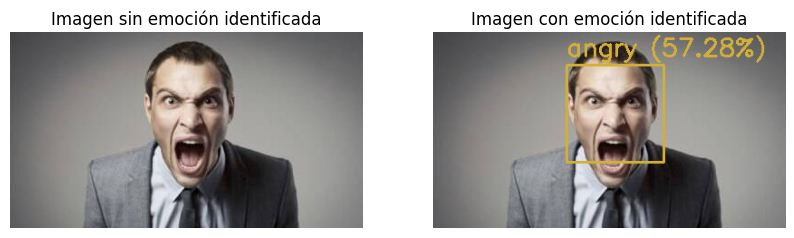

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


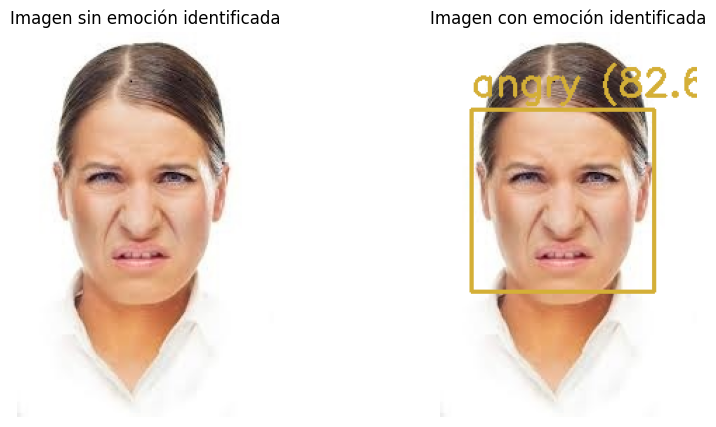

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


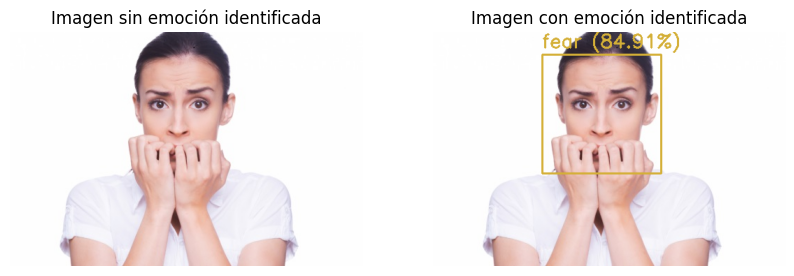

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


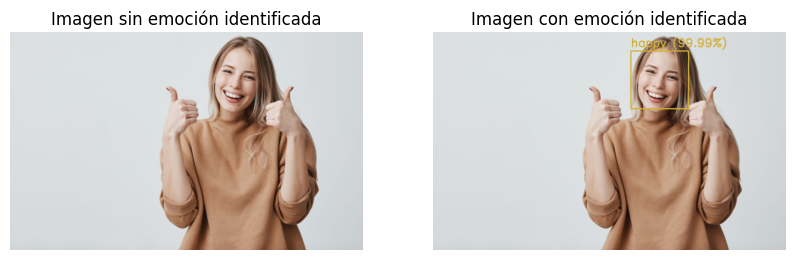

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


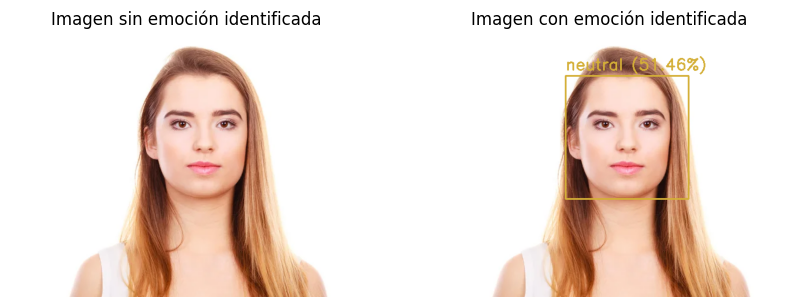

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


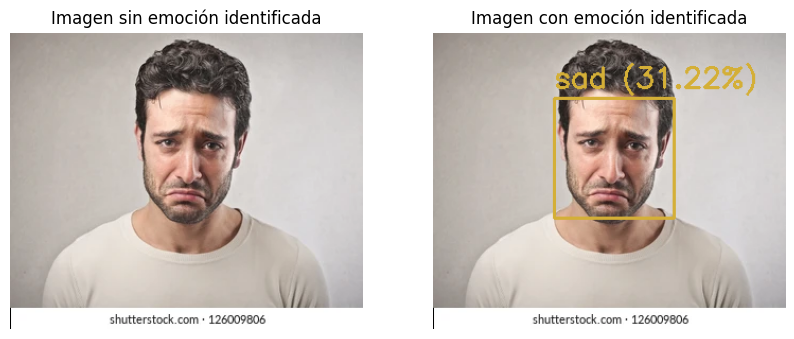

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


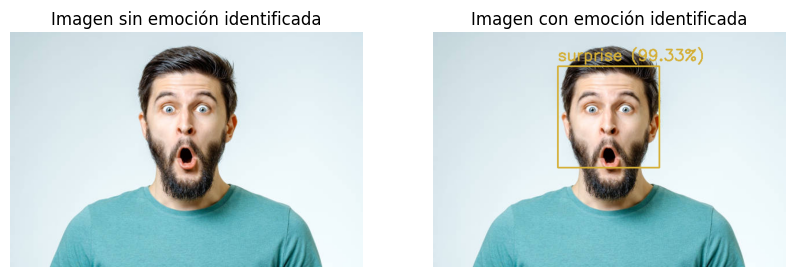

In [15]:
# Procesar cada imagen en la carpeta
for image_path in Path(image_folder_path).glob('*.jpg'):  # Cambia '*.jpg' según el formato de tus imágenes
    # Cargar la imagen y convertirla a escala de grises
    image = cv2.imread(str(image_path))
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detectar rostros en la imagen
    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.3, minNeighbors=5)

    # Crear una copia de la imagen para mostrarla sin la emoción identificada
    original_image = image.copy()

    # Procesar cada rostro detectado
    for (x, y, w, h) in faces:
        # Recortar y redimensionar el rostro a 48x48 píxeles
        face = gray_image[y:y+h, x:x+w]
        face_resized = cv2.resize(face, (48, 48))

        # Normalizar los valores de los píxeles
        face_normalized = face_resized / 255.0

        # Redimensionar la imagen para cumplir con la entrada de la red (1, 48, 48, 1)
        face_input = np.expand_dims(face_normalized, axis=0)
        face_input = np.expand_dims(face_input, axis=-1)

        # Predecir la emoción usando el modelo
        predictions = model.predict(face_input)
        emotion_index = np.argmax(predictions)
        emotion_label = emotions[emotion_index]

        # Obtener el accuracy de la predicción (probabilidad)
        accuracy = np.max(predictions) * 100  # Convertir a porcentaje

        # Dibujar un rectángulo y la etiqueta de la emoción en la imagen
        cv2.rectangle(image, (x, y), (x+w, y+h), (55,175,212), 2)
        cv2.putText(image, f"{emotion_label} ({accuracy:.2f}%)", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (55,175,212), 2)

    # Convertir las imágenes de BGR (OpenCV) a RGB (Matplotlib)
    original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    image_with_emotion_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Mostrar las imágenes antes y después de la detección de emociones
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original_image_rgb)
    plt.title("Imagen sin emoción identificada")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(image_with_emotion_rgb)
    plt.title("Imagen con emoción identificada")
    plt.axis('off')

    plt.show()